In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Load Data
df = pd.read_csv('/kaggle/input/final-earthquake-data-2002-2025/final_earthquake_data_2002_2025.csv')

# 2. Sample 100%
df_sample = df.sample(frac=1, random_state=42)
X_original = df_sample[['Latitude', 'Longitude']].dropna()

# 3. Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# 4. Initialize storage for analysis
# We will store: k, inertia (loss), and number of outliers
metrics = {'k': [], 'loss': [], 'outliers': []}

print(f"Data loaded: {len(X_original)} samples.")
print("Metrics storage initialized.")

Data loaded: 2921770 samples.
Metrics storage initialized.


In [2]:
df.head()

,Timestamp,Latitude,Longitude,Depth,Magnitude,magType,nst,gap,rms,net,...,magSource,year,month,day,hour,dayofweek,dayofyear,energy,magnitude_category,depth_category
0,2002-01-01 00:25:29.220000+00:00,19.302000,-155.295333,43.886,1.2,ml,14.000000,130.00000,0.10,hv,...,hv,2002,1,1,0,1,1,3.981072e+06,Small,Shallow
1,2002-01-01 00:26:28.131000+00:00,60.125600,-152.559100,85.300,2.4,ml,20.355749,136.12593,0.85,ak,...,ak,2002,1,1,0,1,1,2.511886e+08,Small,Intermediate
2,2002-01-01 00:28:02.920000+00:00,38.857500,-122.814333,1.582,1.5,md,7.000000,106.00000,0.07,nc,...,nc,2002,1,1,0,1,1,1.122018e+07,Small,Shallow
3,2002-01-01 00:37:03.350000+00:00,19.301000,-65.035000,25.000,3.7,md,8.000000,136.12593,NaN,us,...,rspr,2002,1,1,0,1,1,2.238721e+10,Small,Shallow
4,2002-01-01 00:49:03.690000+00:00,37.601167,-122.452833,6.906,NaN,NaN,6.000000,122.00000,0.01,nc,...,nc,2002,1,1,0,1,1,NaN,Great,Shallow


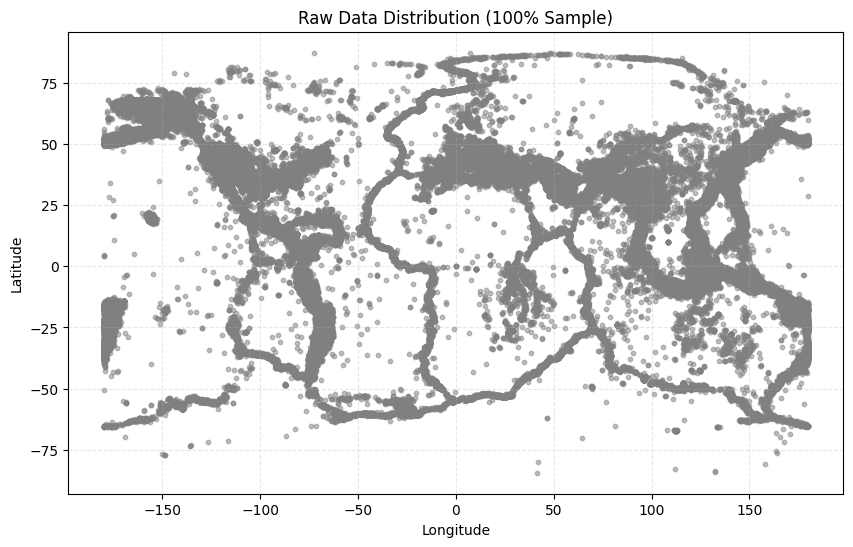

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X_original['Longitude'], X_original['Latitude'], c='gray', s=10, alpha=0.5)
plt.title('Raw Data Distribution (100% Sample)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


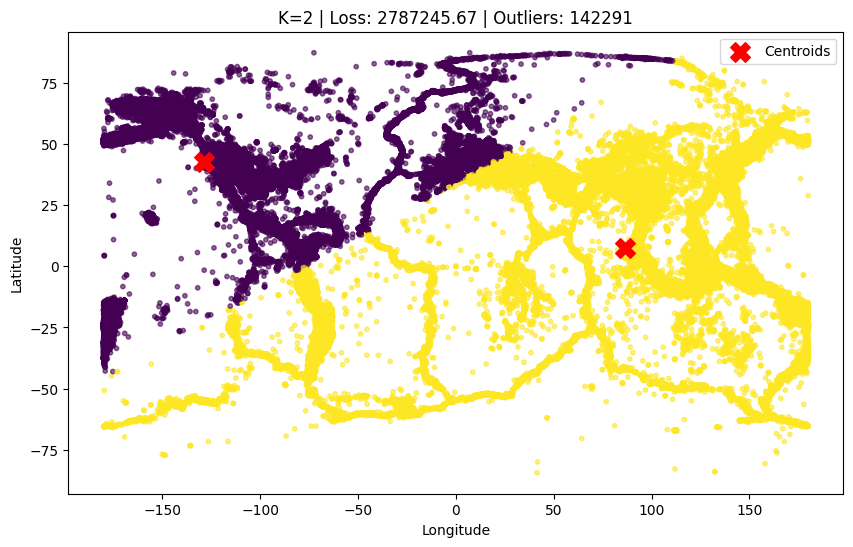

K=2: Loss = 2787245.67, Outliers = 142291


In [4]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# 1. Calculate Loss (Inertia)
loss = kmeans.inertia_

# 2. Calculate Outliers
# Get distance from each point to its assigned centroid
# transform() gives distance to ALL centroids; we take the min (distance to closest/assigned one)
distances = np.min(kmeans.transform(X_scaled), axis=1)
threshold = np.mean(distances) + 2 * np.std(distances)
n_outliers = np.sum(distances > threshold)

# 3. Store Metrics
metrics['k'].append(k)
metrics['loss'].append(loss)
metrics['outliers'].append(n_outliers)

# 4. Plot
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 6))
plt.scatter(X_original['Longitude'], X_original['Latitude'], c=labels, cmap='viridis', s=10, alpha=0.6)
plt.scatter(centroids_original[:, 1], centroids_original[:, 0], c='red', s=200, marker='X', label='Centroids')
plt.title(f'K={k} | Loss: {loss:.2f} | Outliers: {n_outliers}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

print(f"K={k}: Loss = {loss:.2f}, Outliers = {n_outliers}")

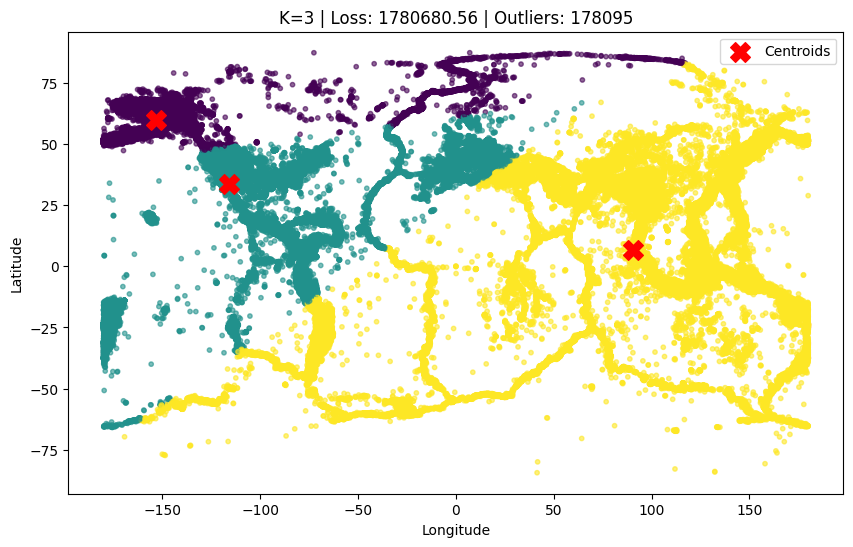

K=3: Loss = 1780680.56, Outliers = 178095


In [5]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

loss = kmeans.inertia_

distances = np.min(kmeans.transform(X_scaled), axis=1)
threshold = np.mean(distances) + 2 * np.std(distances)
n_outliers = np.sum(distances > threshold)

metrics['k'].append(k)
metrics['loss'].append(loss)
metrics['outliers'].append(n_outliers)

centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 6))
plt.scatter(X_original['Longitude'], X_original['Latitude'], c=labels, cmap='viridis', s=10, alpha=0.6)
plt.scatter(centroids_original[:, 1], centroids_original[:, 0], c='red', s=200, marker='X', label='Centroids')
plt.title(f'K={k} | Loss: {loss:.2f} | Outliers: {n_outliers}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

print(f"K={k}: Loss = {loss:.2f}, Outliers = {n_outliers}")

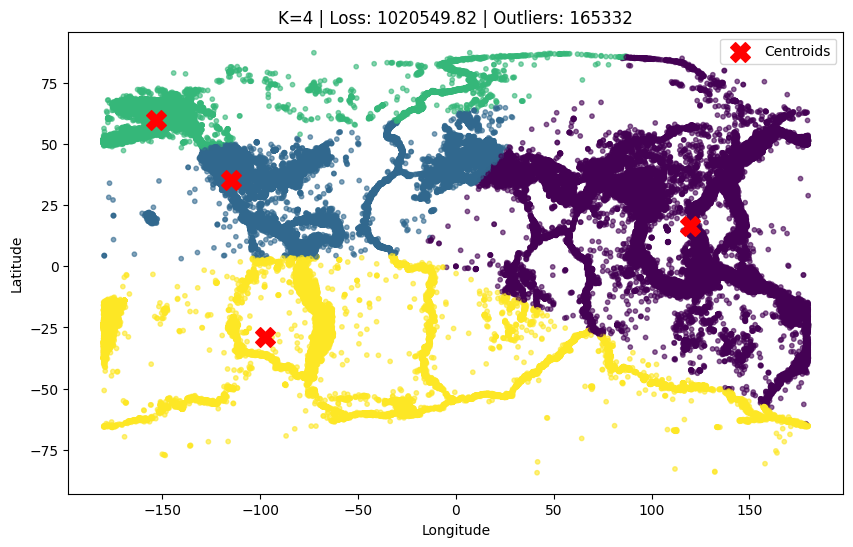

K=4: Loss = 1020549.82, Outliers = 165332


In [6]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

loss = kmeans.inertia_

distances = np.min(kmeans.transform(X_scaled), axis=1)
threshold = np.mean(distances) + 2 * np.std(distances)
n_outliers = np.sum(distances > threshold)

metrics['k'].append(k)
metrics['loss'].append(loss)
metrics['outliers'].append(n_outliers)

centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 6))
plt.scatter(X_original['Longitude'], X_original['Latitude'], c=labels, cmap='viridis', s=10, alpha=0.6)
plt.scatter(centroids_original[:, 1], centroids_original[:, 0], c='red', s=200, marker='X', label='Centroids')
plt.title(f'K={k} | Loss: {loss:.2f} | Outliers: {n_outliers}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

print(f"K={k}: Loss = {loss:.2f}, Outliers = {n_outliers}")

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


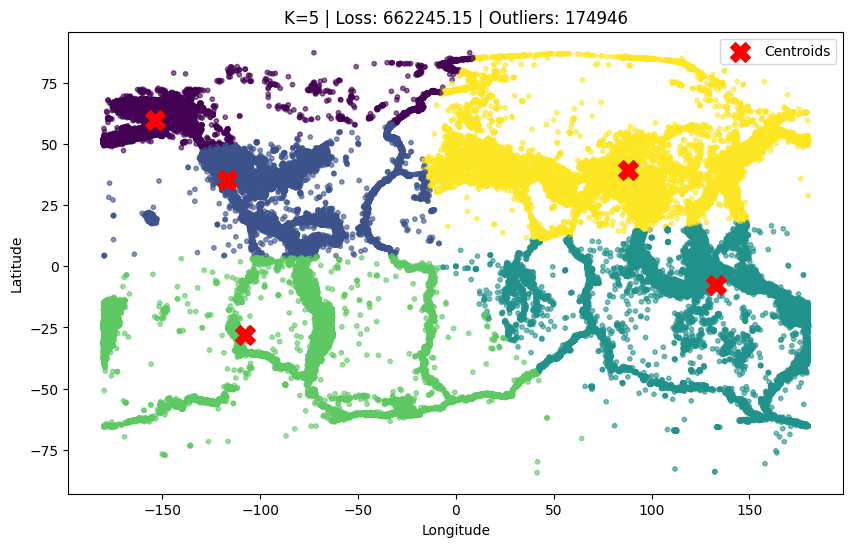

K=5: Loss = 662245.15, Outliers = 174946


In [7]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

loss = kmeans.inertia_

distances = np.min(kmeans.transform(X_scaled), axis=1)
threshold = np.mean(distances) + 2 * np.std(distances)
n_outliers = np.sum(distances > threshold)

metrics['k'].append(k)
metrics['loss'].append(loss)
metrics['outliers'].append(n_outliers)

centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 6))
plt.scatter(X_original['Longitude'], X_original['Latitude'], c=labels, cmap='viridis', s=10, alpha=0.6)
plt.scatter(centroids_original[:, 1], centroids_original[:, 0], c='red', s=200, marker='X', label='Centroids')
plt.title(f'K={k} | Loss: {loss:.2f} | Outliers: {n_outliers}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

print(f"K={k}: Loss = {loss:.2f}, Outliers = {n_outliers}")

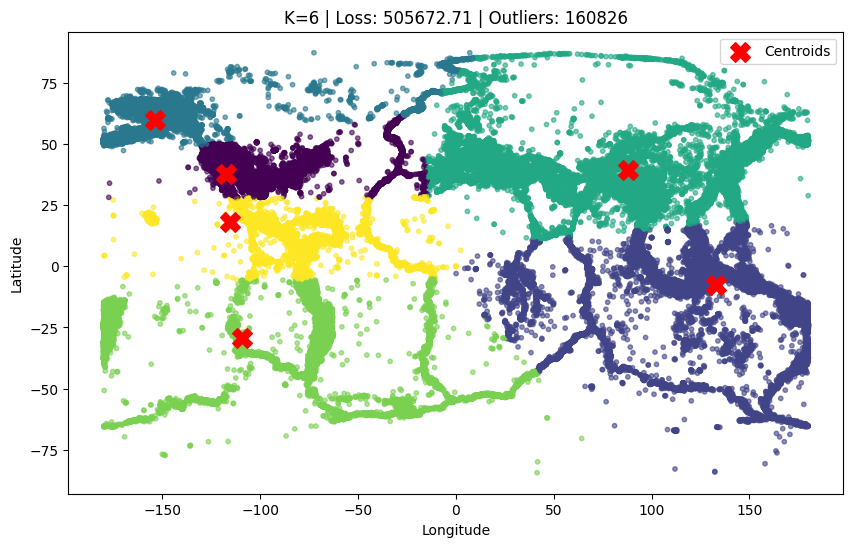

K=6: Loss = 505672.71, Outliers = 160826


In [8]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

loss = kmeans.inertia_

distances = np.min(kmeans.transform(X_scaled), axis=1)
threshold = np.mean(distances) + 2 * np.std(distances)
n_outliers = np.sum(distances > threshold)

metrics['k'].append(k)
metrics['loss'].append(loss)
metrics['outliers'].append(n_outliers)

centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 6))
plt.scatter(X_original['Longitude'], X_original['Latitude'], c=labels, cmap='viridis', s=10, alpha=0.6)
plt.scatter(centroids_original[:, 1], centroids_original[:, 0], c='red', s=200, marker='X', label='Centroids')
plt.title(f'K={k} | Loss: {loss:.2f} | Outliers: {n_outliers}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

print(f"K={k}: Loss = {loss:.2f}, Outliers = {n_outliers}")

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


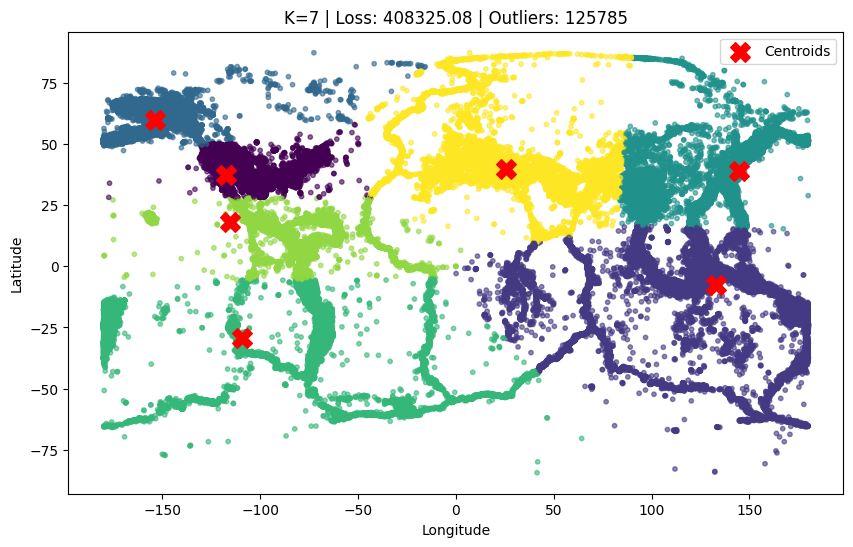

K=7: Loss = 408325.08, Outliers = 125785


In [9]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

loss = kmeans.inertia_

distances = np.min(kmeans.transform(X_scaled), axis=1)
threshold = np.mean(distances) + 2 * np.std(distances)
n_outliers = np.sum(distances > threshold)

metrics['k'].append(k)
metrics['loss'].append(loss)
metrics['outliers'].append(n_outliers)

centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 6))
plt.scatter(X_original['Longitude'], X_original['Latitude'], c=labels, cmap='viridis', s=10, alpha=0.6)
plt.scatter(centroids_original[:, 1], centroids_original[:, 0], c='red', s=200, marker='X', label='Centroids')
plt.title(f'K={k} | Loss: {loss:.2f} | Outliers: {n_outliers}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

print(f"K={k}: Loss = {loss:.2f}, Outliers = {n_outliers}")

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


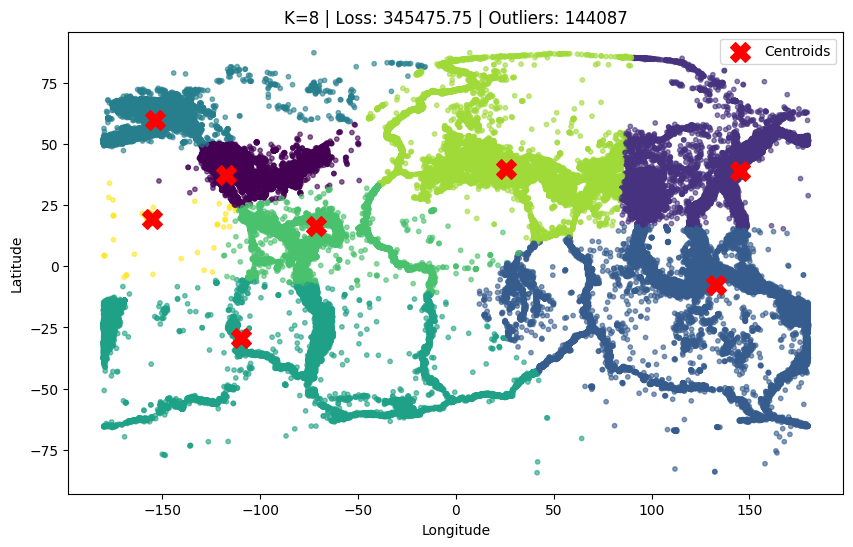

K=8: Loss = 345475.75, Outliers = 144087


In [10]:
k = 8
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

loss = kmeans.inertia_

distances = np.min(kmeans.transform(X_scaled), axis=1)
threshold = np.mean(distances) + 2 * np.std(distances)
n_outliers = np.sum(distances > threshold)

metrics['k'].append(k)
metrics['loss'].append(loss)
metrics['outliers'].append(n_outliers)

centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 6))
plt.scatter(X_original['Longitude'], X_original['Latitude'], c=labels, cmap='viridis', s=10, alpha=0.6)
plt.scatter(centroids_original[:, 1], centroids_original[:, 0], c='red', s=200, marker='X', label='Centroids')
plt.title(f'K={k} | Loss: {loss:.2f} | Outliers: {n_outliers}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

print(f"K={k}: Loss = {loss:.2f}, Outliers = {n_outliers}")

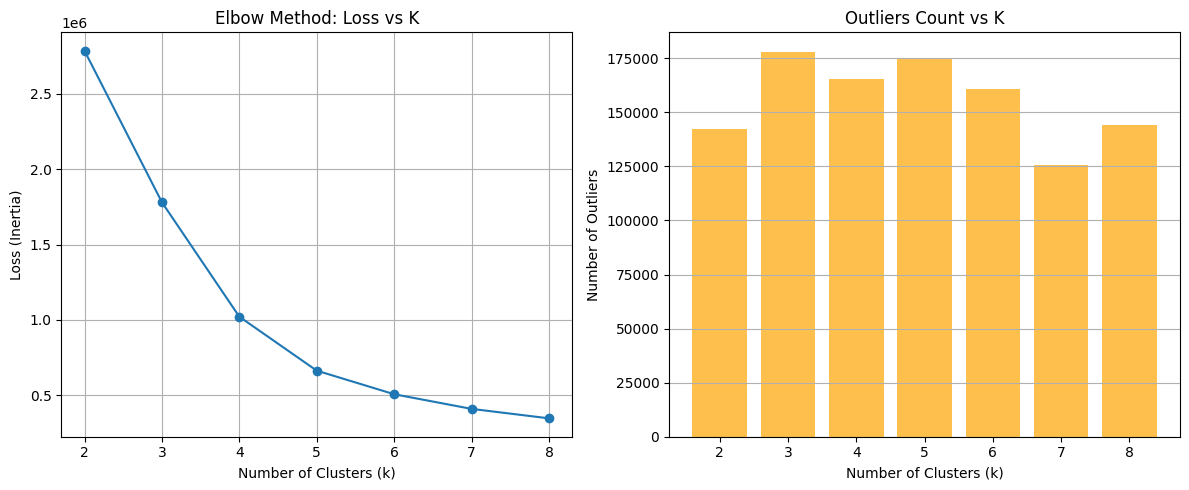

--- SUMMARY TABLE ---
   k          loss  outliers
0  2  2.787246e+06    142291
1  3  1.780681e+06    178095
2  4  1.020550e+06    165332
3  5  6.622451e+05    174946
4  6  5.056727e+05    160826
5  7  4.083251e+05    125785
6  8  3.454758e+05    144087

--- ANALYSIS CONCLUSION ---
1. Loss Trend: As K increases, Loss decreases. Look for the 'elbow' where the decrease slows down.
2. Outliers: Lower outliers might indicate better cluster fit, but too few might mean overfitting.


In [11]:
# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(metrics)

# Plot Loss vs K (Elbow Method)
plt.figure(figsize=(12, 5))

# Subplot 1: Loss (Inertia)
plt.subplot(1, 2, 1)
plt.plot(results_df['k'], results_df['loss'], marker='o', linestyle='-')
plt.title('Elbow Method: Loss vs K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Loss (Inertia)')
plt.grid(True)

# Subplot 2: Outliers Count
plt.subplot(1, 2, 2)
plt.bar(results_df['k'], results_df['outliers'], color='orange', alpha=0.7)
plt.title('Outliers Count vs K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Number of Outliers')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# --- CONCLUSION GENERATION ---
best_k_idx = np.argmin(np.diff(results_df['loss'])) # Simple heuristic for "elbow"
suggested_k = results_df.iloc[best_k_idx]['k']

print("--- SUMMARY TABLE ---")
print(results_df)
print("\n--- ANALYSIS CONCLUSION ---")
print(f"1. Loss Trend: As K increases, Loss decreases. Look for the 'elbow' where the decrease slows down.")
print(f"2. Outliers: Lower outliers might indicate better cluster fit, but too few might mean overfitting.")